In [ ]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#read in Movie data and inspect

df = pd.read_csv('C:\\Users\\britt\\OneDrive\\Documents\\data\\WGU D496 project\\tmdb_5000_movies.csv')
df.head(10)

df.info()


#Check for duplicates and drop them if necessary
df.duplicated

df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
#What are the top grossing movies?

#sort by revenue and get the top 10
top_grossing = df.sort_values(by='revenue', ascending=False).head(10)
top_grossing[['title', 'revenue','release_date']]

,title,revenue,release_date
0,Avatar,2787965087,2009-12-10
25,Titanic,1845034188,1997-11-18
16,The Avengers,1519557910,2012-04-25
28,Jurassic World,1513528810,2015-06-09
44,Furious 7,1506249360,2015-04-01
7,Avengers: Age of Ultron,1405403694,2015-04-22
124,Frozen,1274219009,2013-11-27
31,Iron Man 3,1215439994,2013-04-18
546,Minions,1156730962,2015-06-17
26,Captain America: Civil War,1153304495,2016-04-27


In [ ]:
#What movies have the highest budget?

#name new df, sort by budget, and get the top 10
top_budget = df.sort_values(by='budget', ascending=False)
top_budget[['title', 'budget','release_date']].head(10)

,title,budget,release_date
17,Pirates of the Caribbean: On Stranger Tides,380000000,2011-05-14
1,Pirates of the Caribbean: At World's End,300000000,2007-05-19
7,Avengers: Age of Ultron,280000000,2015-04-22
10,Superman Returns,270000000,2006-06-28
6,Tangled,260000000,2010-11-24
4,John Carter,260000000,2012-03-07
5,Spider-Man 3,258000000,2007-05-01
13,The Lone Ranger,255000000,2013-07-03
9,Batman v Superman: Dawn of Justice,250000000,2016-03-23
8,Harry Potter and the Half-Blood Prince,250000000,2009-07-07


<Axes: xlabel='release_year', ylabel='budget'>

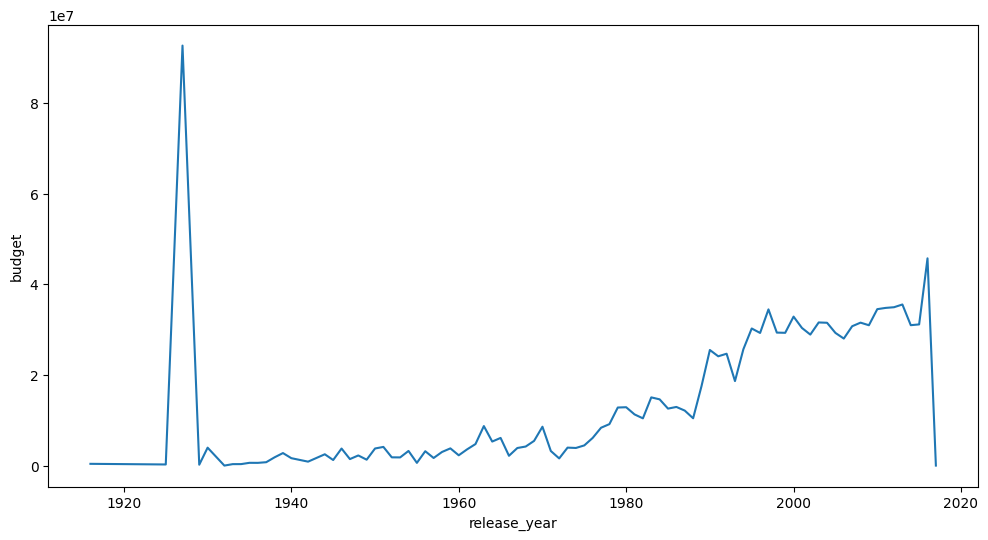

In [ ]:
#How have movie budgets changed over time?

#convert datatype of release_date to datetime and extract the year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

#creat new df to calculate average budget per year
budget_over_time = df.groupby('release_year')['budget'].mean().reset_index()

#create a line plot to visualize the average budget over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_over_time, x='release_year', y='budget')

<Axes: xlabel='release_year'>

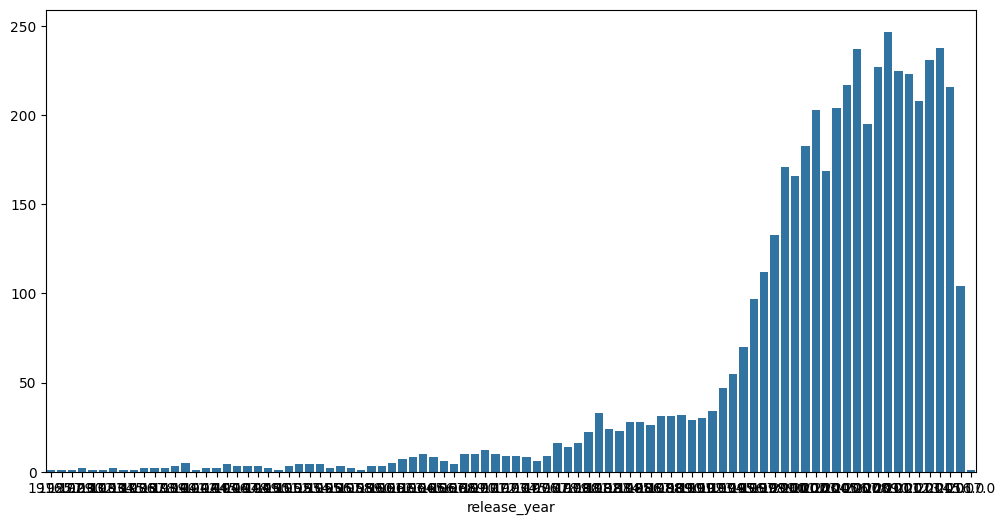

In [ ]:
#How many movies were released each year?

#create a new df to count movies per year
movies_per_year = df['release_year'].value_counts().sort_index()

#create a bar plot to visualize the number of movies released each year
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values)

# Conclusion

### In summary, the movie industry has produced more movies on an annual basis on average since the early 1900s. The average budget per movie has also increased over time. As a result, we can see most of the highest budgets ever recorded for movies has been in recent history. This trend of increased funding may have resulted in increased quality, thus resulting in our highest grossing movies to come from the same time frame. It's important to note, that a high budget does not necessarily equate to a top grossing move as noted by the fact that none of the highest budgeted movies were in the top grossing list.